<a href="https://colab.research.google.com/github/architvasan/MichiganTutorialMolecularData/blob/main/ChemicalData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to chemical data

## Background information
* All molecules are built of various combinations of atoms found in the periodic table!
* Certain rules dictate the combination of elements to form these molecules according to their position within the periodic table.

![PT](https://github.com/architvasan/MichiganTutorialMolecularData/blob/main/images/Colour_18-col_PT_with_labels.png?raw=1)


## Small molecules
* Many small molecules relevant to living systems are carbon containing
* Carbon is singled out because it has a chemical diversity unrivaled by any other chemical element.
* Its diversity is based on the following:
  * Carbon atoms bond reasonably strongly with other carbon atoms.
  * Carbon atoms bond reasonably strongly with atoms of other elements.
  * Carbon atoms are the building block of the vast majority of molecules for life!
* In general, chemistry of life is dominated by the following elements:
  * Carbon
  * Nitrogen
  * Oxygen
  * Phosphorus
  * Sulfur
  * Hydrogen
* Organic compounds are represented in 2D by the following diagrams. Since hydrogen and carbon are so ubiquitous, they are not listed in these diagrams.

![ochem](https://github.com/architvasan/MichiganTutorialMolecularData/blob/main/images/ochem_ex.gif?raw=1)

* During this talk, we will focus on these carbon-containing "organic compounds". There is a vast diversity of compounds that exist outside of this umbrella given the name "inorganic compounds".

#### Inorganic small molecules


#### Polymers

Polymers are large molecules consisting of multiple monomers stitched together with molecular bonds. Examples of these include nucleic acids, proteins, lipids, and carbohydrates. Alex Brace discussed nucleic acids and proteins specifically during his talk.

![protein](https://github.com/architvasan/MichiganTutorialMolecularData/blob/main/images/protein.png?raw=1)
![nucleidacid](https://github.com/architvasan/MichiganTutorialMolecularData/blob/main/images/nucleicacid.png?raw=1)
![lipid](https://github.com/architvasan/MichiganTutorialMolecularData/blob/main/images/Lipid.png?raw=1)
![carbohydrates](https://github.com/architvasan/MichiganTutorialMolecularData/blob/main/images/carbs.jpg?raw=1)


## Types of molecular data

### 2-dimensional data

Arguably, the most common molecular data type seen are 2-dimensional representations of atoms connected to one another with atomic bonds. There are advantages and disadvantages with this datatype though:

These 2D-graphs can be represented compactly using adjacency matrices and node lists:

![adjmat](https://github.com/architvasan/MichiganTutorialMolecularData/blob/main/images/adjac_matrix.jpg?raw=1)
**Advantages**

* Simplicity and Clarity
* Ease of Visualization
* Compatibility with Databases
* Integration with Analytical Data

**Disadvantages**
* Lack of Spatial Information
* Stereochemistry
* Conformational Flexibility
* Computational Modeling Limitations

These datatypes are typically incorporated into deep learning models using graph models such as GNNs and Graph Transformers.


In [ ]:
!pip install rdkit
!pip install networkx
!pip install matplotlib

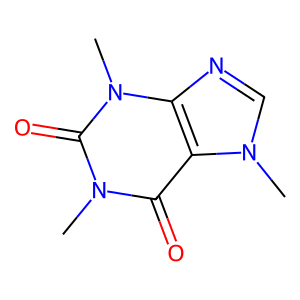

In [ ]:
# import library --------------------------------------------------------------
from rdkit import Chem
import networkx as nx
import matplotlib.pyplot as plt

# define the smiles string and covert it into a molecule sturcture ------------
caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
caffeine_mol = Chem.MolFromSmiles(caffeine_smiles)
Draw.MolToImage(caffeine_mol)


In [ ]:
# define the function for coverting rdkit object to networkx object -----------
def mol_to_nx(mol):
    G = nx.Graph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   is_aromatic=atom.GetIsAromatic(),
                   atom_symbol=atom.GetSymbol())

    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType())

    return G



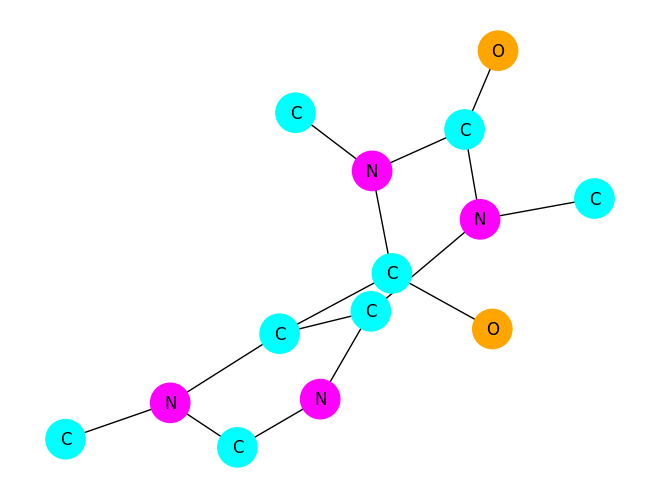

In [ ]:
# conver rdkit object to networkx object --------------------------------------
caffeine_nx = mol_to_nx(caffeine_mol)

caffeine_atom = nx.get_node_attributes(caffeine_nx, 'atom_symbol')

color_map = {'C': 'cyan',
             'O': 'orange',
             'N': 'magenta'}

caffeine_colors = []
for idx in caffeine_nx.nodes():
    if (caffeine_nx.nodes[idx]['atom_symbol'] in color_map):
        caffeine_colors.append(color_map[caffeine_nx.nodes[idx]['atom_symbol']])
    else:
        caffeine_colors.append('gray')

nx.draw(caffeine_nx,
        labels=caffeine_atom,
        with_labels = True,
        node_color=caffeine_colors,
        node_size=800)

plt.show()

### 3-dimensional data

3D chemical data offers numerous advantages over 2D data, especially in contexts where spatial information is critical.

**Advantages**

* Accurate Representation of Molecular Geometry:
* Stereochemistry
* Conformational Analysis
* Visualization

**Disadvantages**

* Computational Resource Requirements
* Data Accuracy and Quality
* Limited Availability
* Overemphasis on static structures

Common models used to incorporate these 3D structures are GNNs and 3D convolutional networks.


## Sequential data types

In addition to 2-D and 3-D data types, molecules can also be represented as text! Since molecules have no obvious grammar to their structures, chemical languages have been developed with their own rules to account for different chemical information such as atom types, bonds, rings, and charges.

## Simplified molecular-input line-entry system (SMILES)

SMILES (Simplified molecular-input line-entry system) is a line notation method to represent molecules as well as reactions. It is one of the most common method to represent molecules because of its simplicity and readability to the human eye.

Examples:

Propane: CCC

Butane:  CCCC

Ethene:  C=C

### Atoms

All non-Hydrogen atoms are represented by their atomic symbols. Any unfulfilled valency of an atom is assumed to be Hydrogen. For example, writing a simple C means that it’s actually a CH4 (Methane) and not an elemental Carbon. Similarly, N is NH3 (Ammonia) and O is H2O (Water).

To represent elemental atoms, a [ ] (Square bracket) notation is used. For example, [S] is elemental Sulfur. In case you want to explicitly add the Hydrogens to a SMILES string, the square bracket can be used here as well. For example, Methane and Ethane can be written as [CH4] and [CH3][CH3] respectively.

### Bonds

Single, double, and triple bonds are represented by the symbols -, =, and #, respectively. Same as Hydrogens, single bonds are often omitted for simplicity. Adjacent atoms are assumed to be connected by a single or aromatic bond.

There can be multiple ways to represent a molecule in the SMILES string. For example, all the following notations are correct for Ethane: CC, C-C, [CH3]-[CH3], [CH3]-C

![smiles_intro](https://github.com/architvasan/MichiganTutorialMolecularData/blob/main/images/SMILES_intro.png?raw=1)

### Charged molecules

In case of charged atoms or molecules, the square bracket notation is used. The positive charge is represented by a + sign and a negative charge by - sign.

![smiles_charged](https://github.com/architvasan/MichiganTutorialMolecularData/blob/main/images/SMILES_charge.png?raw=1)

### Branched molecules

Parentheses are used to create a branch in the SMILES string.

![smiles_branched](https://github.com/architvasan/MichiganTutorialMolecularData/blob/main/images/SMILES_branch.png?raw=1)

### Cyclic (ring) structures

Ring structures are written by breaking each ring at an arbitrary point to make an acyclic structure and adding numerical ring closure labels to show connectivity between non-adjacent atoms.

If there are two rings: we break one bond each from both the rings and assign separate numbers to each involved atom.

![smiles_rings](https://github.com/architvasan/MichiganTutorialMolecularData/blob/main/images/SMILES_rings.png?raw=1)

### Aromatic structures

A preferred way to represent them: aromatic atoms are represented by lowercase letters. For example, aromatic Carbon by c, Nitrogen by n, Boron by b, and so on.

Example: benzene

Benzene can be written as c1ccccc1. Here, adjacent atoms are not assumed to be connected by a single bond but rather the lowercase letters tells us that this is a aromatic ring signifying alternate single and double bonds.

![smiles_aromatics](https://github.com/architvasan/MichiganTutorialMolecularData/blob/main/images/SMILES_aromatics.png?raw=1)

### Disconnected structures

Ions in the ionic molecules are not connected by a covalent bond with each other. Disconnected compounds are written as individual structures separated by a . (period). For example, Sodium Hydroxide in its ionized form will be written as [Na+].[OH-].

![smiles_disconnected](https://github.com/architvasan/MichiganTutorialMolecularData/blob/main/images/SMILES_disconnected.png?raw=1)


In [ ]:
!pip install pubchempy

  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13820 sha256=d18cd886145a734f3aa3503f3441b0727a2387bda51fadf84c9f1199785abb89
  Stored in directory: /root/.cache/pip/wheels/90/7c/45/18a0671e3c3316966ef7ed9ad2b3f3300a7e41d3421a44e799
Successfully built pubchempy


C([C@@H]1[C@H]([C@@H]([C@H](C(O1)O)O)O)O)O


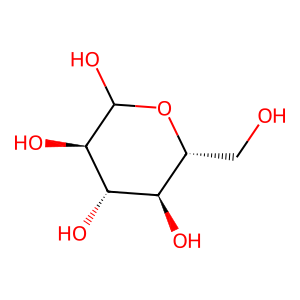

In [ ]:
import pubchempy as pcp
results = pcp.get_compounds('Glucose', 'name')
for compound in results:
  print(compound.isomeric_smiles)
  mol = Chem.MolFromSmiles(compound.isomeric_smiles)
Draw.MolToImage(mol)


## SELFIES
A limitation of SMILES strings is that they have a very complex grammar. When used in machine learning models, many of the results can be invalid.

An alternative system used is the Self-referencing embedded strings (SELFIES) which is claimed to be 100% robust. Even entirely random SELFIES strings represent correct molecular graphs; this makes this language ideal for a generative machine learning model. The SELFIES grammar can be thought of as a elementary computer program that is transformed into a molecular graph with a simple compiler.

SELFIES are designed with two general ideas:

First, the non-local features in SMILES (rings and branches) are localized. SELFIES represents rings and branches by their length. After a ring and branch symbol, the subsequent symbol is interpreted as a number that stands for a length. This circumvents many syntactical issues with non-local features.

Second, physical constraints are encoded by different states of the formal grammar. For example,a molecule of the form C=C=C is possible (three carbons connected via double bonds). However, F=O=F is not possible, because fluorine can only form one bond (not two) and oxygen can only form two bonds (not four as in this example). In SELFIES, after compiling a symbol into a part of the graph, the derivation state changes. This can be considered as a minimal memory that ensures the fulfilment of physical constraints.

![smiles_disconnected](https://github.com/architvasan/MichiganTutorialMolecularData/blob/main/images/SELFIES.png?raw=1)

In [ ]:
! pip install selfies

In [ ]:
import selfies as sf

benzene = "c1ccccc1"

# SMILES -> SELFIES -> SMILES translation
try:
    benzene_sf = sf.encoder(benzene)  # [C][=C][C][=C][C][=C][Ring1][=Branch1]
    benzene_smi = sf.decoder(benzene_sf)  # C1=CC=CC=C1
except sf.EncoderError:
    pass  # sf.encoder error!
except sf.DecoderError:
    pass  # sf.decoder error!

len_benzene = sf.len_selfies(benzene_sf)  # 8

symbols_benzene = list(sf.split_selfies(benzene_sf))
# ['[C]', '[=C]', '[C]', '[=C]', '[C]', '[=C]', '[Ring1]', '[=Branch1]']

In [ ]:
print(benzene_sf)

[C][=C][C][=C][C][=C][Ring1][=Branch1]


In [ ]:
print(benzene_smi)

C1=CC=CC=C1


In [ ]:
print(symbols_benzene)

['[C]', '[=C]', '[C]', '[=C]', '[C]', '[=C]', '[Ring1]', '[=Branch1]']
